# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [359]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Transforming Data
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA



# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [360]:
# Loading and viewing data
wholesale_data = pd.read_csv('Wholesale_Data.csv')

In [361]:
wholesale_data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [362]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [363]:
wholesale_data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [364]:
# No data missing, onto EDA and visualization of data
discrete_cols = ['Channel', 'Region']
continuous_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [365]:
# Replace values with strong for easier OHE later
wholesale_data['Channel'].replace({1:'1', 2:'2'},inplace=True)
wholesale_data['Region'].replace({1:'1', 2:'2', 3:'3'},inplace=True)

C:\Users\kool3\AppData\Local\Temp\ipykernel_16952\1428739260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wholesale_data['Channel'].replace({1:'1', 2:'2'},inplace=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_16952\1428739260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

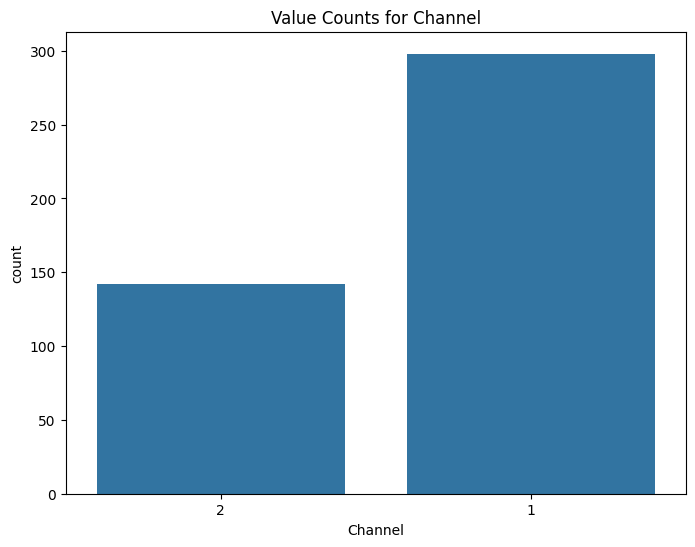

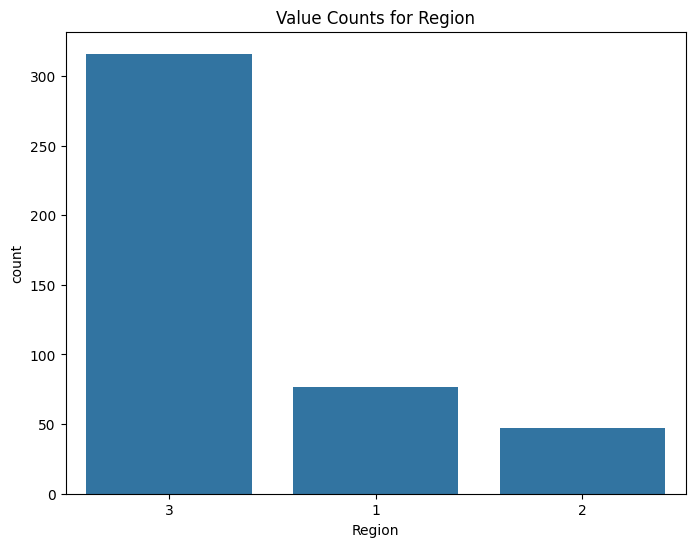

In [366]:
# Viewing Discrete data
for col in discrete_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=wholesale_data, x=col)
    plt.title(f'Value Counts for {col}')
    plt.show()

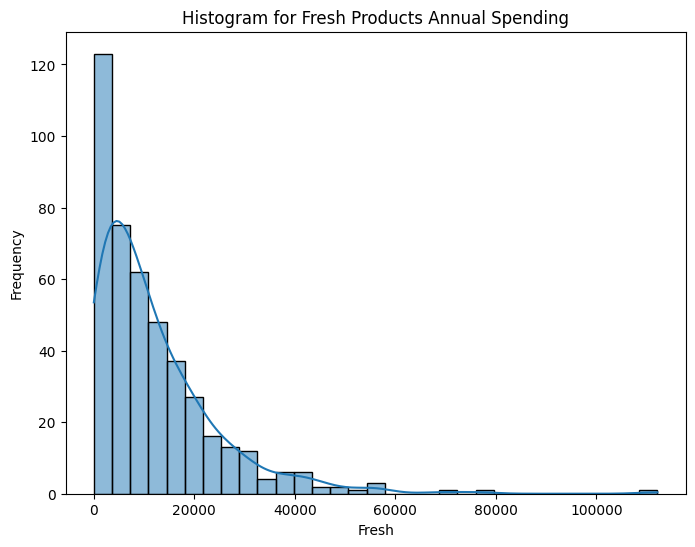

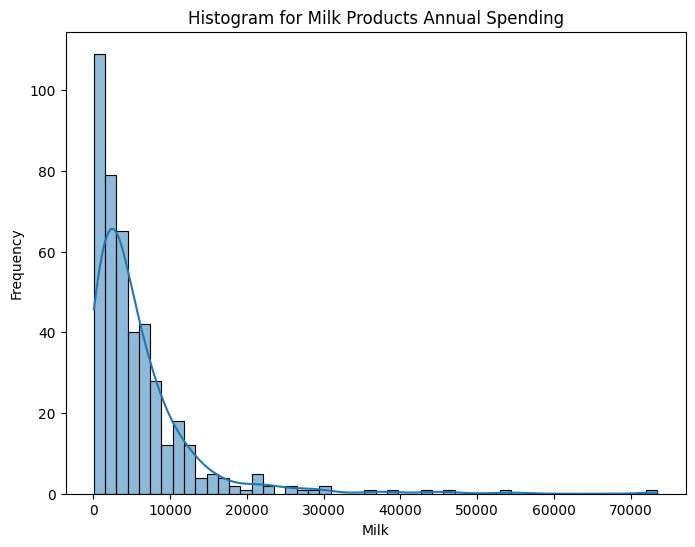

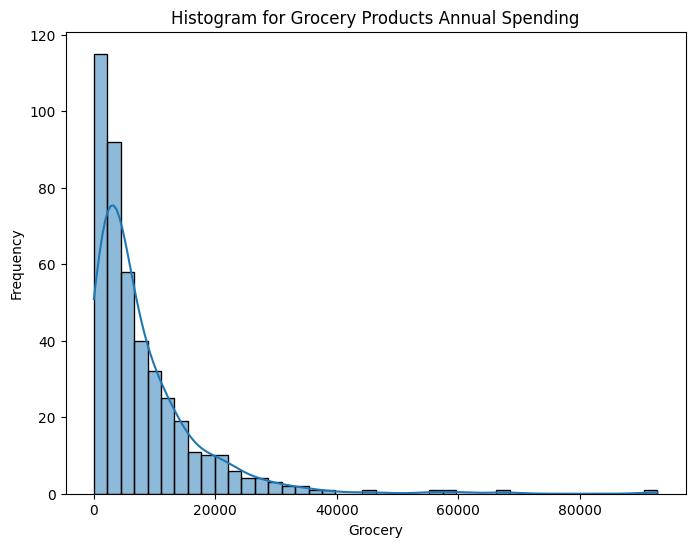

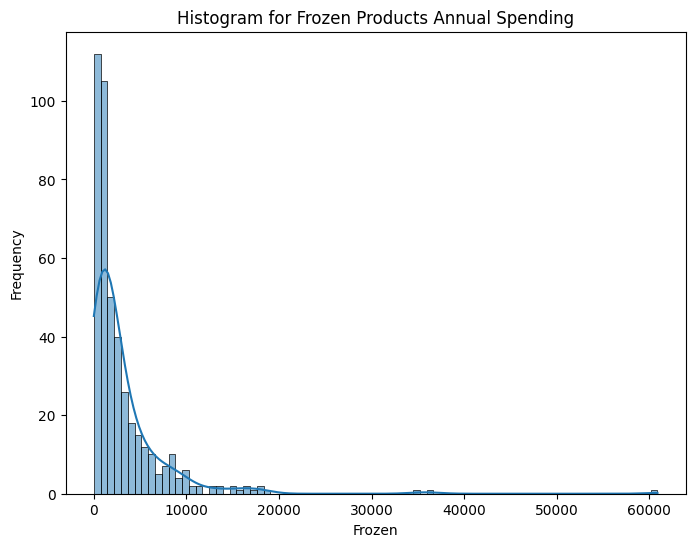

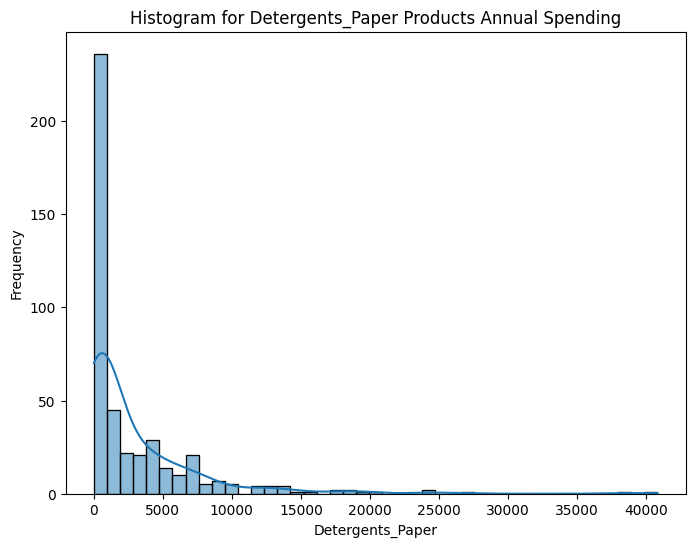

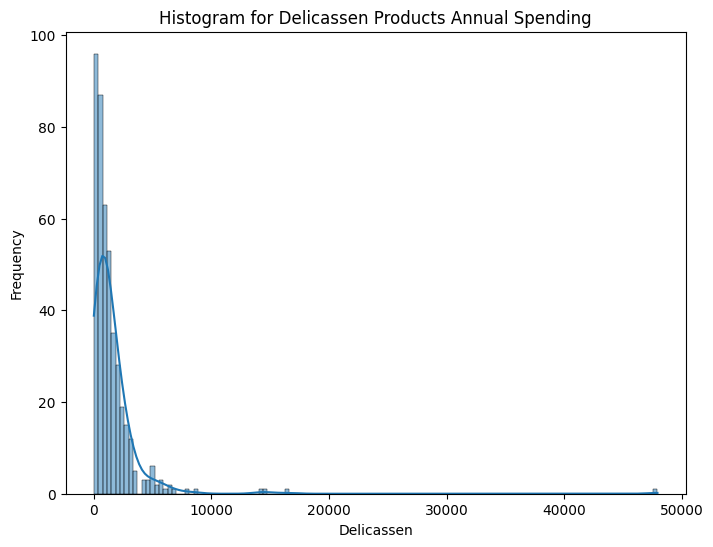

In [367]:
# Viewing Continuous Data
for cols in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=wholesale_data, x=cols, kde=True)
    plt.title(f'Histogram for {cols} Products Annual Spending')
    plt.ylabel('Frequency')
    plt.show()

In [368]:
# All columns are right skewed with a couple extreme values
# Defining outliers as more than 3 std out from mean. 
# Since all the columns are right skewed, only removing outliers on the higher end

# Getting the mean and std from describe dataframe
describe = wholesale_data.describe().loc[['mean','std']][continuous_cols]

# Removing Outliers
droppedOutliers = wholesale_data

for cols in continuous_cols:
    upperLimit = describe.loc['mean'][cols] + (3 * describe.loc['std'][cols])
    droppedOutliers = droppedOutliers[droppedOutliers[cols] <= upperLimit]

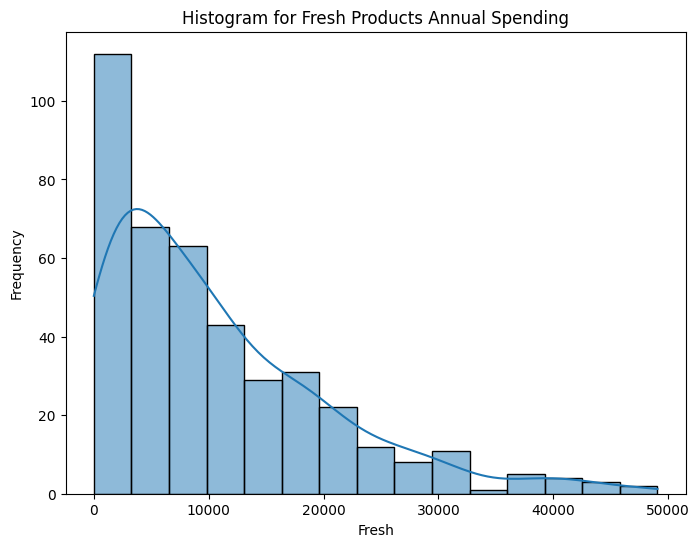

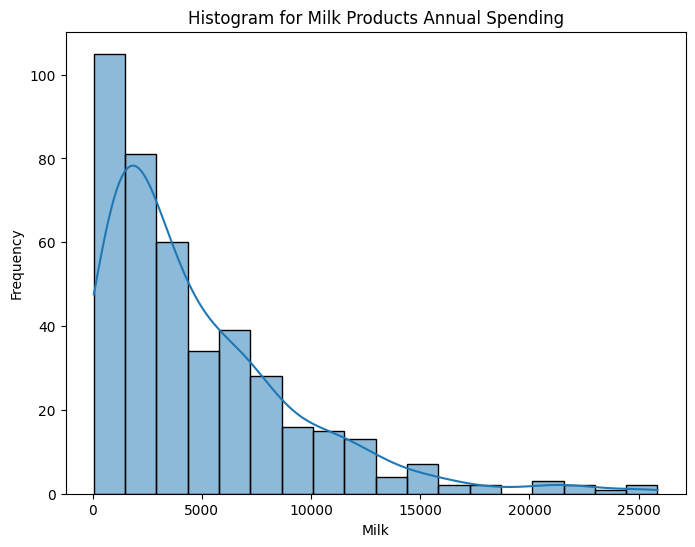

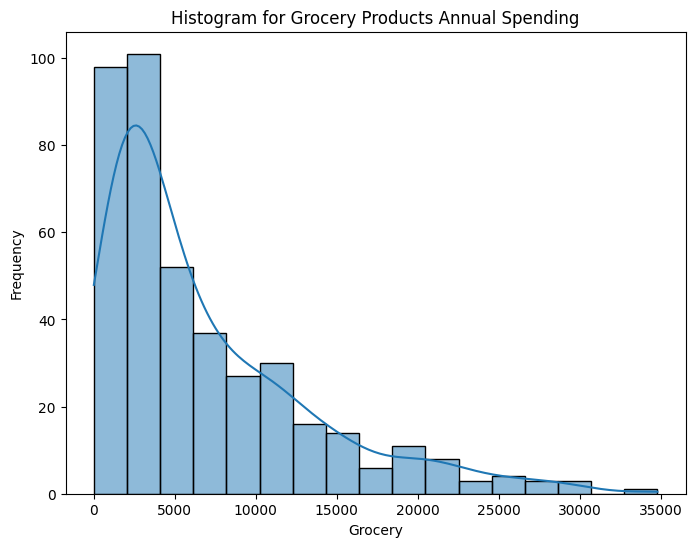

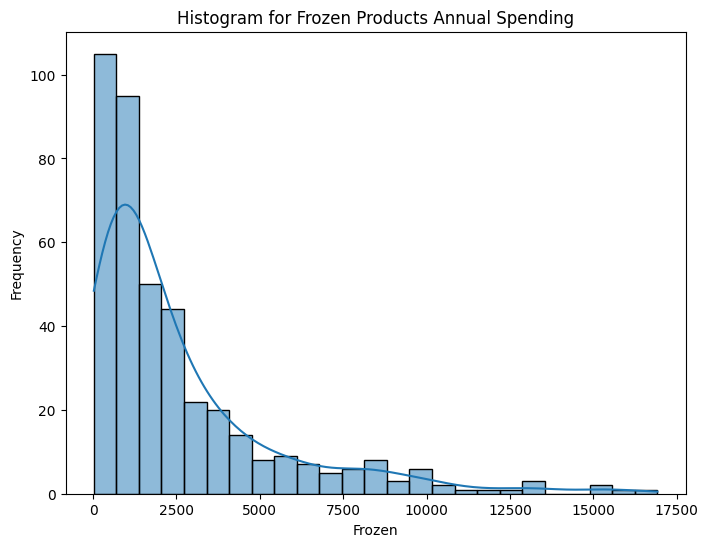

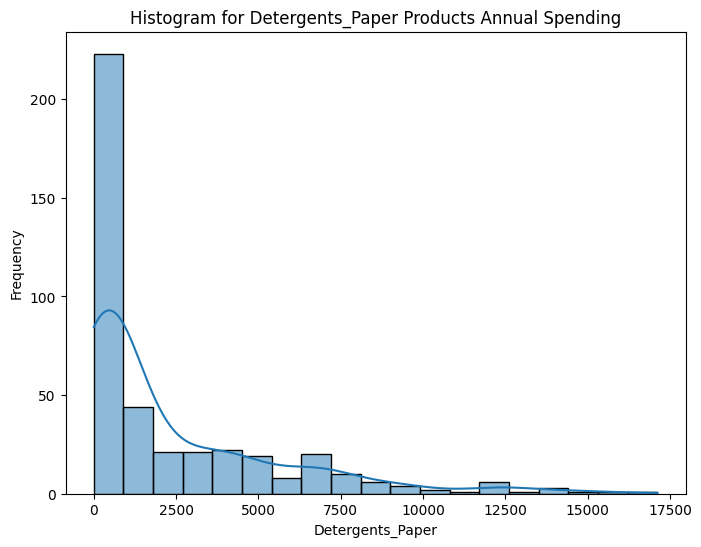

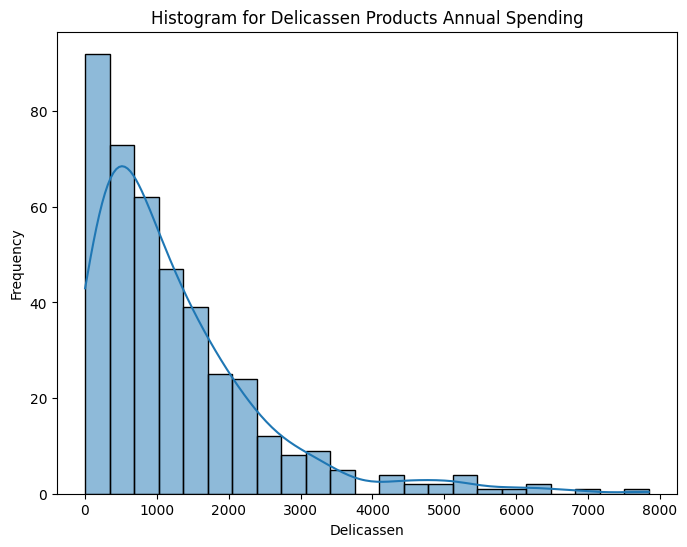

In [369]:
# Viewiing data following dropped outliers
for cols in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=droppedOutliers, x=cols, kde=True)
    plt.title(f'Histogram for {cols} Products Annual Spending')
    plt.ylabel('Frequency')
    plt.show()

In [370]:
# Outliers removed, reset index
droppedOutliers.reset_index(drop=True,inplace=True)
droppedOutliers

Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0         2      3  12669   9656     7561     214              2674   
1         2      3   7057   9810     9568    1762              3293   
2         2      3   6353   8808     7684    2405              3516   
3         1      3  13265   1196     4221    6404               507   
4         2      3  22615   5410     7198    3915              1777   
..      ...    ...    ...    ...      ...     ...               ...   
409       1      3  29703  12051    16027   13135               182   
410       1      3  39228   1431      764    4510                93   
411       2      3  14531  15488    30243     437             14841   
412       1      3  10290   1981     2232    1038               168   
413       1      3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
409        2204  
410        2346  
411        1867  
412        2125  
413          52  

[414 rows x 8 columns]

In [371]:
# Data still right-skeweed.
# Transforming data by scaling and normalizing

normalizedData = np.sqrt(droppedOutliers[continuous_cols])

scaler = StandardScaler()
scaledData = pd.DataFrame(scaler.fit_transform(normalizedData), columns = continuous_cols)

scaledData.describe()

Fresh          Milk       Grocery        Frozen  \
count  4.140000e+02  4.140000e+02  4.140000e+02  4.140000e+02   
mean   2.123905e-16  1.630472e-16 -1.029772e-16 -2.316987e-16   
std    1.001210e+00  1.001210e+00  1.001210e+00  1.001210e+00   
min   -1.906545e+00 -1.852339e+00 -2.016175e+00 -1.563887e+00   
25%   -7.744802e-01 -8.187082e-01 -7.860903e-01 -7.197828e-01   
50%   -4.983049e-02 -1.200385e-01 -1.944860e-01 -2.367498e-01   
75%    6.989416e-01  6.696849e-01  6.811885e-01  5.090283e-01   
max    2.733861e+00  3.258318e+00  3.118752e+00  3.460102e+00   

       Detergents_Paper    Delicassen  
count      4.140000e+02  4.140000e+02  
mean      -1.029772e-16 -6.007004e-17  
std        1.001210e+00  1.001210e+00  
min       -1.267889e+00 -1.874345e+00  
25%       -7.847381e-01 -7.288424e-01  
50%       -3.793348e-01 -1.096870e-01  
75%        7.365299e-01  6.055709e-01  
max        3.135625e+00  3.608285e+00

In [372]:
# Dealing with discrete data
discreteEncoded = pd.get_dummies(droppedOutliers[['Channel','Region']])
discreteEncoded

Channel_1  Channel_2  Region_1  Region_2  Region_3
0        False       True     False     False      True
1        False       True     False     False      True
2        False       True     False     False      True
3         True      False     False     False      True
4        False       True     False     False      True
..         ...        ...       ...       ...       ...
409       True      False     False     False      True
410       True      False     False     False      True
411      False       True     False     False      True
412       True      False     False     False      True
413       True      False     False     False      True

[414 rows x 5 columns]

In [373]:
# final transformed data dataframe
transformedData = pd.concat([discreteEncoded,scaledData],axis=1)
transformedData

Channel_1  Channel_2  Region_1  Region_2  Region_3     Fresh      Milk  \
0        False       True     False     False      True  0.433501  1.174358   
1        False       True     False     False      True -0.169343  1.200361   
2        False       True     False     False      True -0.260142  1.027302   
3         True      False     False     False      True  0.488762 -0.947248   
4        False       True     False     False      True  1.232196  0.351050   
..         ...        ...       ...       ...       ...       ...       ...   
409       True      False     False     False      True  1.695936  1.557893   
410       True      False     False     False      True  2.238905 -0.839128   
411      False       True     False     False      True  0.602166  2.046760   
412       True      False     False     False      True  0.198767 -0.616583   
413       True      False     False     False      True -0.828420 -0.726579   

      Grocery    Frozen  Detergents_Paper  Delicassen  
0    0.351912 -1.177116          0.436700    0.325836  
1    0.653742 -0.078612          0.630217    0.677137  
2    0.371486  0.205163          0.695402    3.608285  
3   -0.258985  1.449750         -0.559002    0.686111  
4    0.293198  0.748608          0.110772    2.562740  
..        ...       ...               ...         ...  
409  1.453505  2.838896         -0.866843    0.980467  
410 -1.296248  0.932844         -0.998053    1.074465  
411  2.768049 -0.925026          2.827994    0.744455  
412 -0.751520 -0.470582         -0.884894    0.926858  
413 -0.672163 -1.440881         -0.582069   -1.528403  

[414 rows x 11 columns]

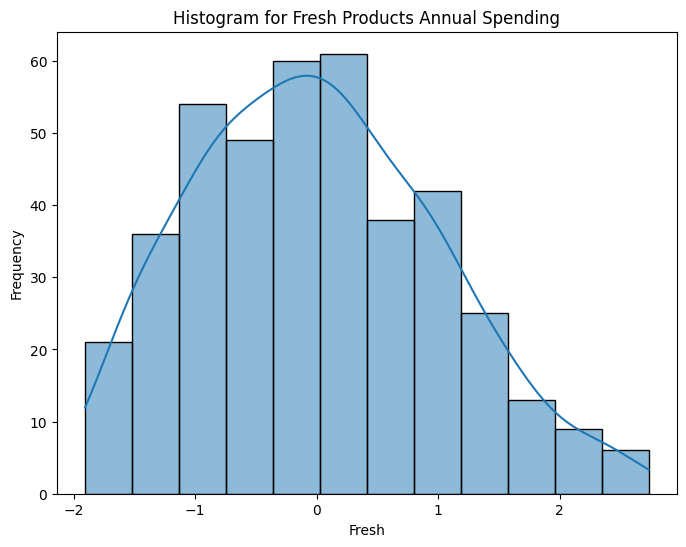

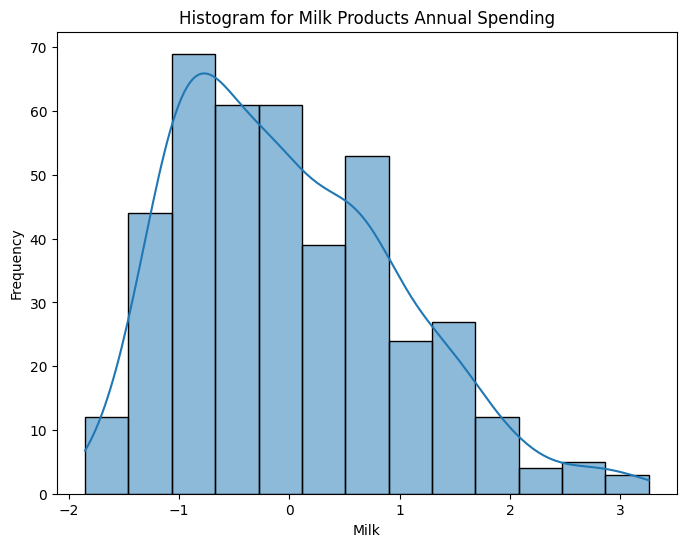

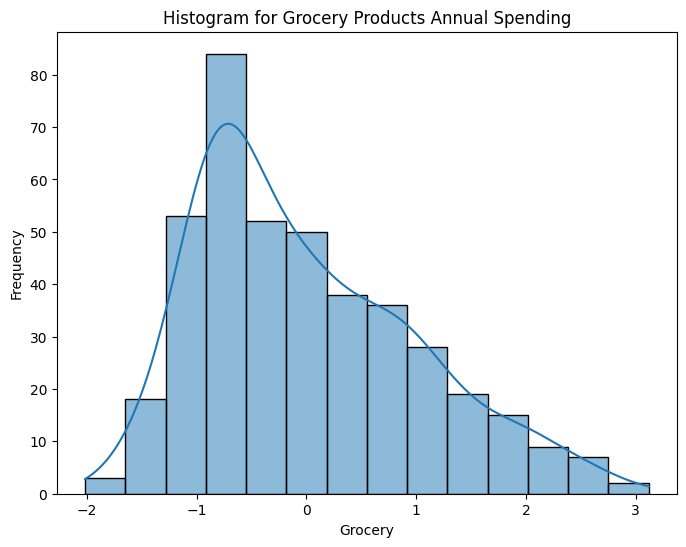

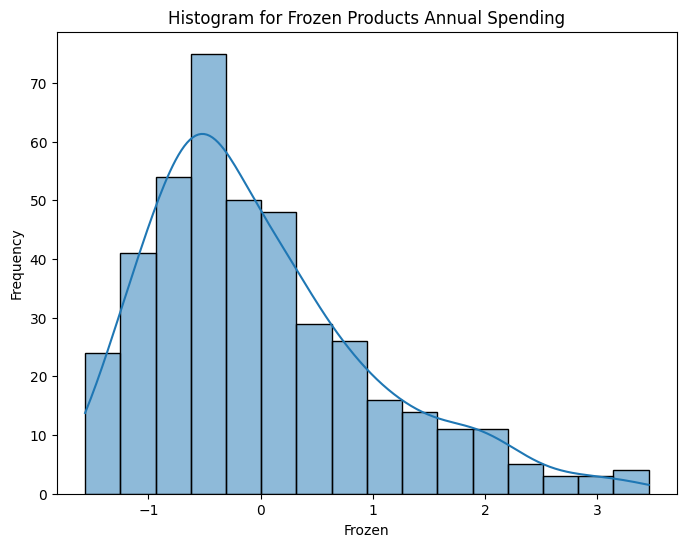

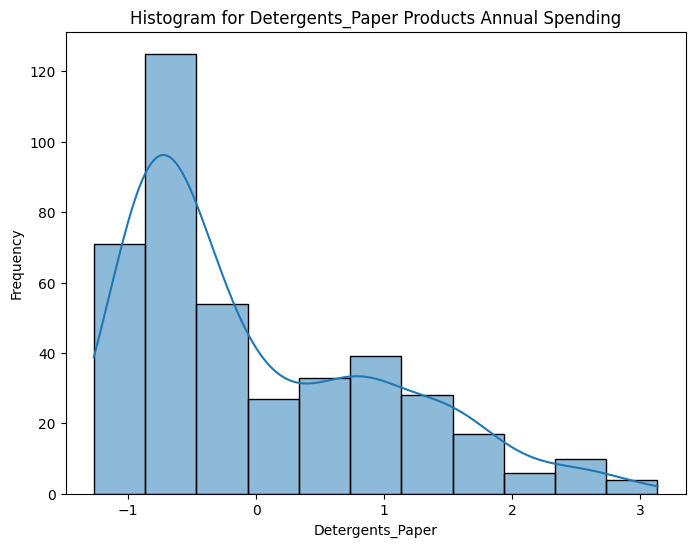

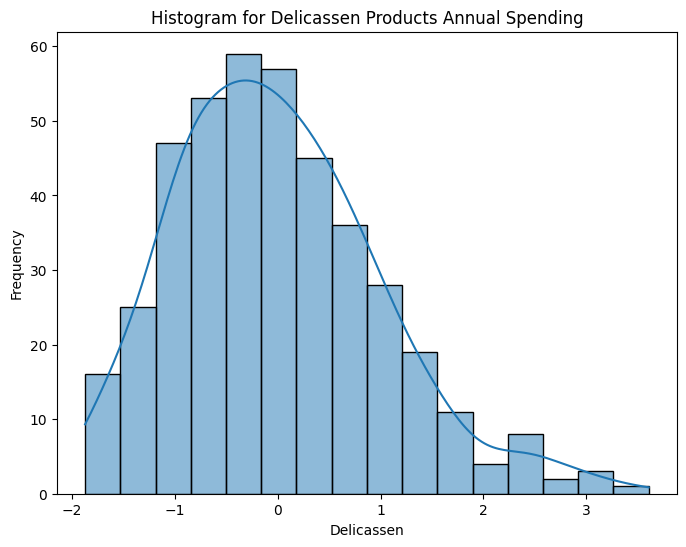

In [374]:
# Viewing tranformed scaled data
for cols in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=transformedData, x=cols, kde=True)
    plt.title(f'Histogram for {cols} Products Annual Spending')
    plt.ylabel('Frequency')
    plt.show()

In [375]:
transformedData.describe()

Fresh          Milk       Grocery        Frozen  \
count  4.140000e+02  4.140000e+02  4.140000e+02  4.140000e+02   
mean   2.123905e-16  1.630472e-16 -1.029772e-16 -2.316987e-16   
std    1.001210e+00  1.001210e+00  1.001210e+00  1.001210e+00   
min   -1.906545e+00 -1.852339e+00 -2.016175e+00 -1.563887e+00   
25%   -7.744802e-01 -8.187082e-01 -7.860903e-01 -7.197828e-01   
50%   -4.983049e-02 -1.200385e-01 -1.944860e-01 -2.367498e-01   
75%    6.989416e-01  6.696849e-01  6.811885e-01  5.090283e-01   
max    2.733861e+00  3.258318e+00  3.118752e+00  3.460102e+00   

       Detergents_Paper    Delicassen  
count      4.140000e+02  4.140000e+02  
mean      -1.029772e-16 -6.007004e-17  
std        1.001210e+00  1.001210e+00  
min       -1.267889e+00 -1.874345e+00  
25%       -7.847381e-01 -7.288424e-01  
50%       -3.793348e-01 -1.096870e-01  
75%        7.365299e-01  6.055709e-01  
max        3.135625e+00  3.608285e+00

Correlation Heatmap

<Axes: >

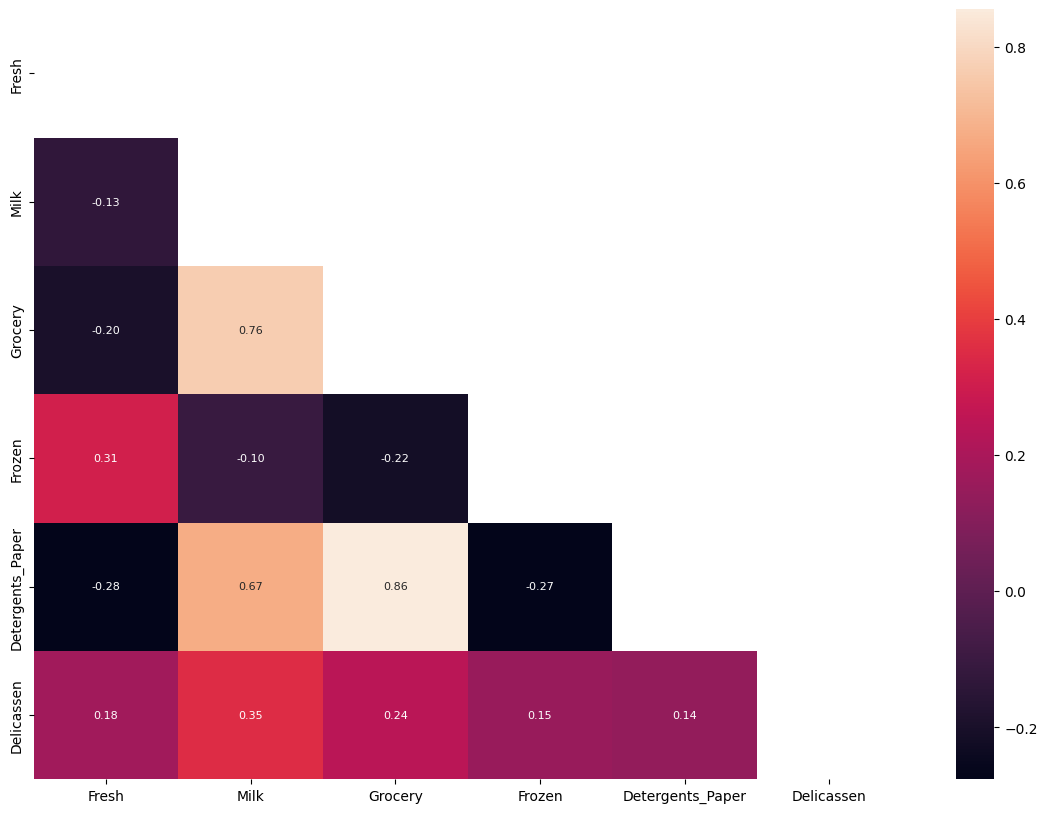

In [376]:
# Correlation heatmap of numerical
plt.figure(figsize=(14, 10))
sns.heatmap(
    transformedData[continuous_cols].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(wholesale_data[continuous_cols].corr(), dtype=bool))
)

Observations for correlations 
* Detergents Paper is highly correlated with Grocery
* Milk also correlated with Grocery
* Slightly unexpected, but detergent paper and milk also correlated, likely as they both fall under grocery.
* Deli not very correlated with groceries

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:14

c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:14

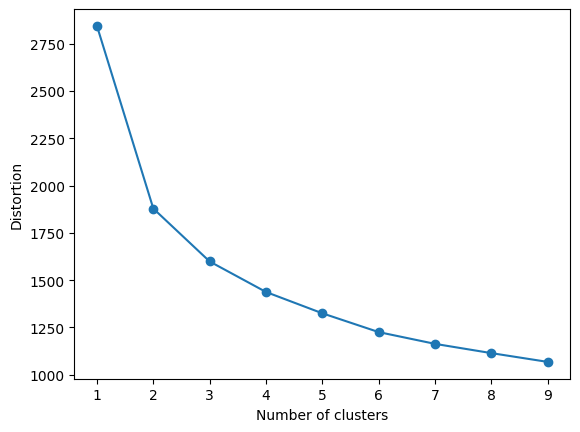

In [377]:
# Determining nclusters with elbow rule
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(transformedData)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show() 

In [378]:
# Going to use 2 clusters

km = KMeans(n_clusters=2, n_init=10, random_state=42)

# fit and predict
y_km = km.fit_predict(transformedData)

kmClusters = pd.DataFrame(y_km, columns=['cluster'])

c:\Users\kool3\anaconda3\envs\Lighthouse\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


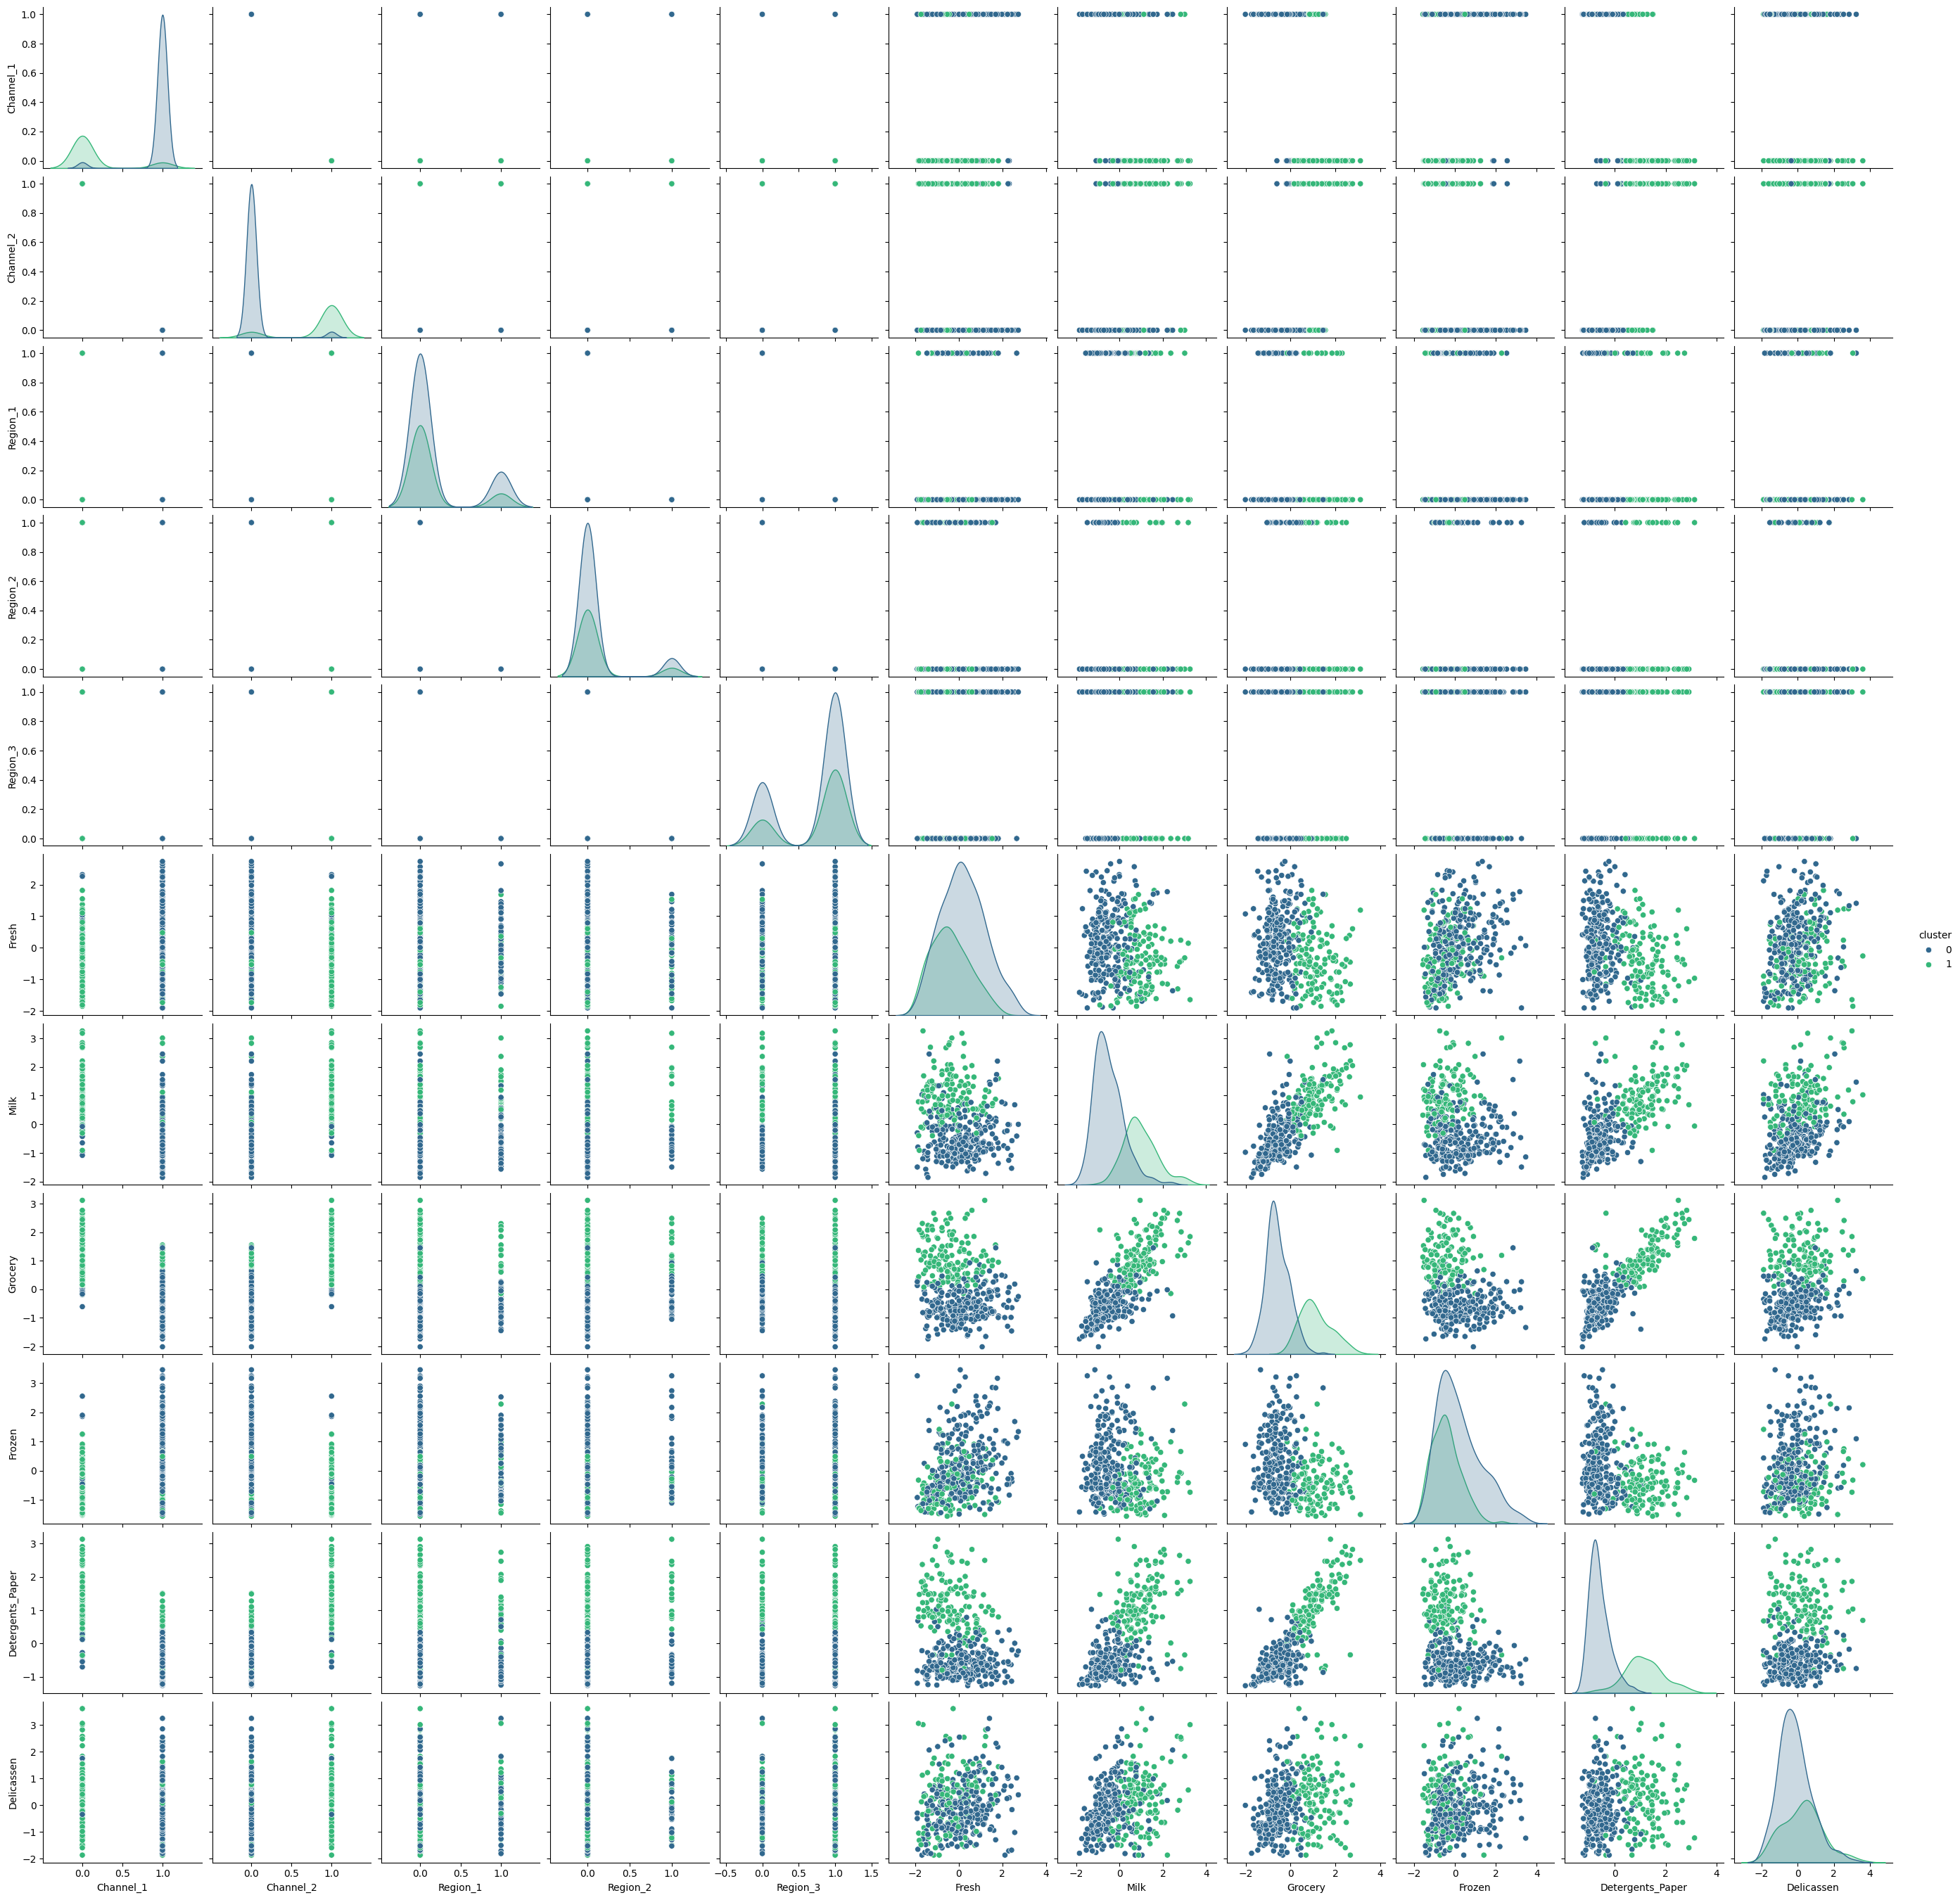

In [379]:
# Pairplot of clusters and features 
data = pd.concat([transformedData,kmClusters], axis=1)
sns.pairplot(data, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

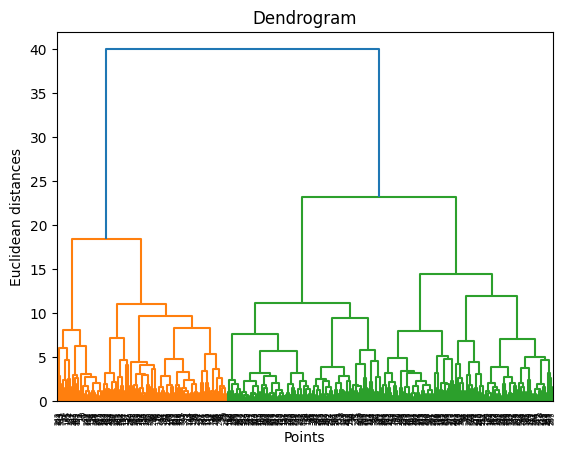

In [380]:
# Plotting dendogram to determine optimal clusters
dendrogram = sch.dendrogram(sch.linkage(transformedData[continuous_cols], method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()

In [381]:
# Optimum number of clusters appears to be 2
# Fitting model
ac = AgglomerativeClustering(linkage='ward', n_clusters=2)
y_hc = ac.fit_predict(transformedData)
hcClusters = pd.DataFrame(y_hc, columns=['cluster'])


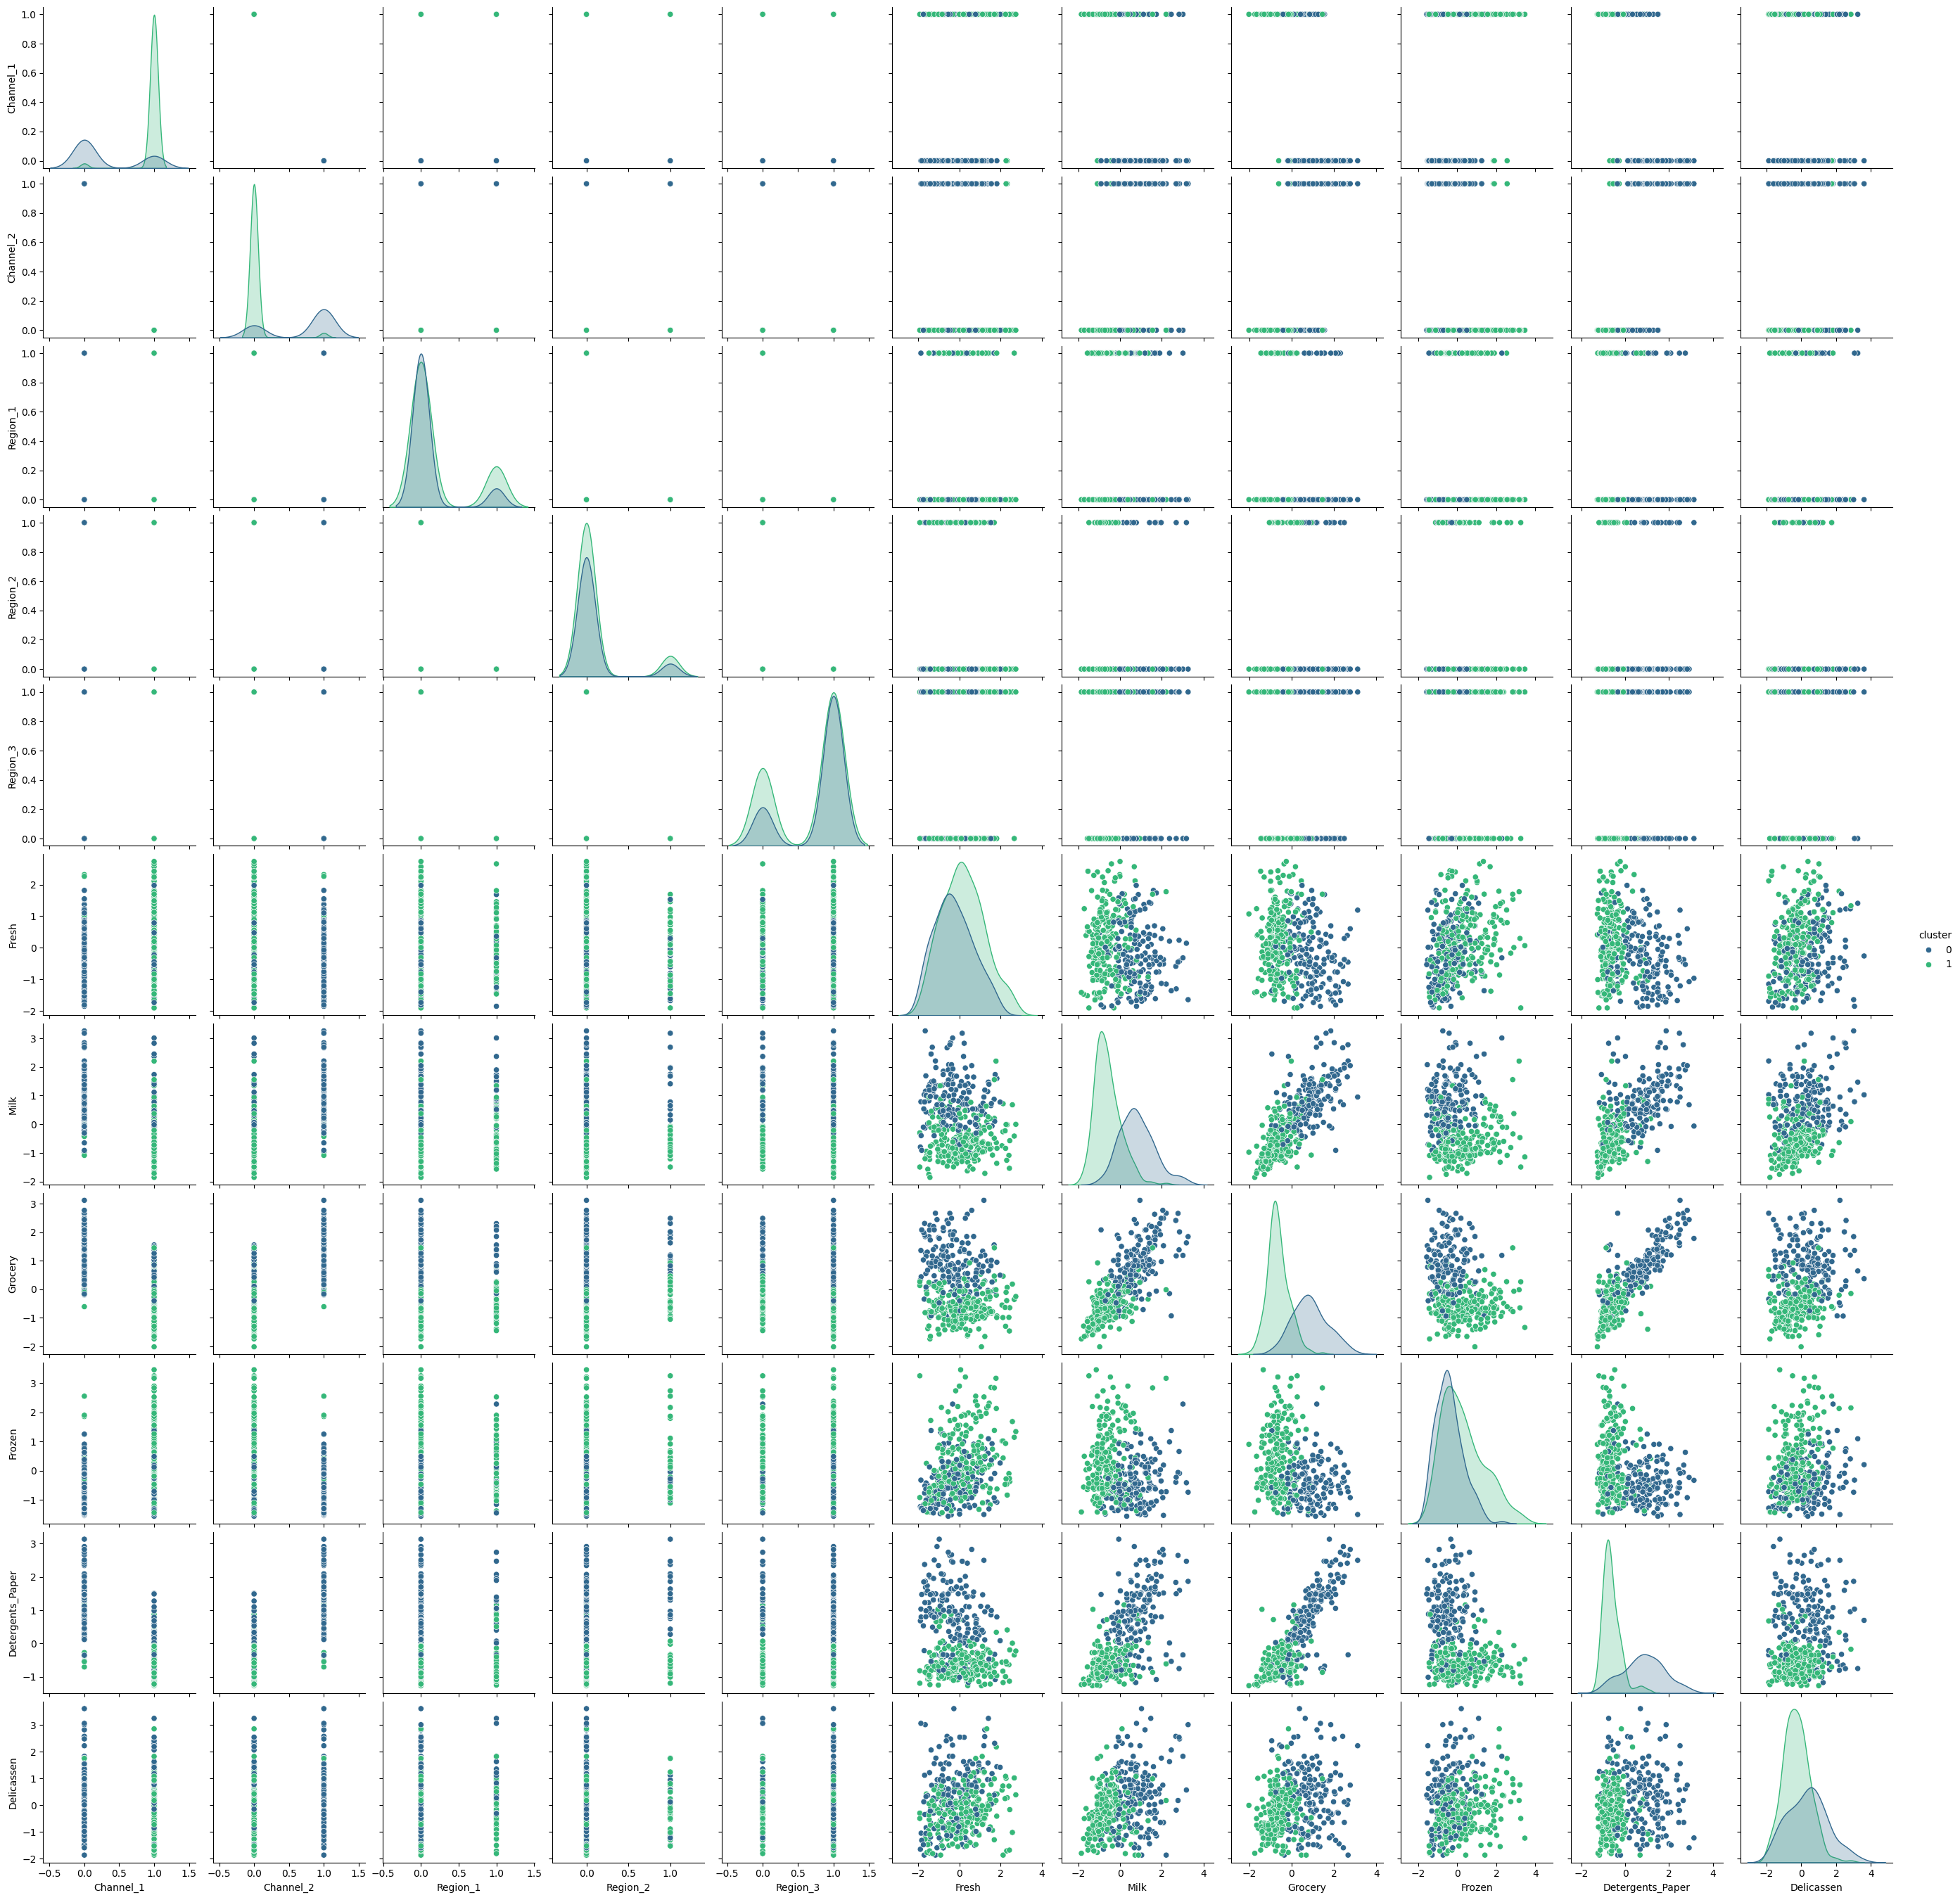

In [382]:
# Pairplot of clusters and features 
data = pd.concat([transformedData,hcClusters], axis=1)
sns.pairplot(data, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [383]:
transformedData

Channel_1  Channel_2  Region_1  Region_2  Region_3     Fresh      Milk  \
0        False       True     False     False      True  0.433501  1.174358   
1        False       True     False     False      True -0.169343  1.200361   
2        False       True     False     False      True -0.260142  1.027302   
3         True      False     False     False      True  0.488762 -0.947248   
4        False       True     False     False      True  1.232196  0.351050   
..         ...        ...       ...       ...       ...       ...       ...   
409       True      False     False     False      True  1.695936  1.557893   
410       True      False     False     False      True  2.238905 -0.839128   
411      False       True     False     False      True  0.602166  2.046760   
412       True      False     False     False      True  0.198767 -0.616583   
413       True      False     False     False      True -0.828420 -0.726579   

      Grocery    Frozen  Detergents_Paper  Delicassen  
0    0.351912 -1.177116          0.436700    0.325836  
1    0.653742 -0.078612          0.630217    0.677137  
2    0.371486  0.205163          0.695402    3.608285  
3   -0.258985  1.449750         -0.559002    0.686111  
4    0.293198  0.748608          0.110772    2.562740  
..        ...       ...               ...         ...  
409  1.453505  2.838896         -0.866843    0.980467  
410 -1.296248  0.932844         -0.998053    1.074465  
411  2.768049 -0.925026          2.827994    0.744455  
412 -0.751520 -0.470582         -0.884894    0.926858  
413 -0.672163 -1.440881         -0.582069   -1.528403  

[414 rows x 11 columns]

In [384]:
# Using 2 components from elbow
pca = PCA(n_components=2)
y_pca = pca.fit_transform(transformedData)
pcaComponents = pd.DataFrame(y_pca,columns=['PC1','PC2'])
pcaComponents

PC1       PC2
0    1.493400  0.039338
1    1.730783  0.522227
2    1.992852  2.298112
3   -1.284045  1.277884
4    0.748967  2.687625
..        ...       ...
409  0.246858  3.522323
410 -2.181773  2.176652
411  4.468639  0.728689
412 -1.092248  0.273003
413 -0.982658 -2.305336

[414 rows x 2 columns]

In [385]:
# Variance ratio for 2 components
print(pca.explained_variance_ratio_)

[0.44180284 0.2100712 ]


In [403]:
pcaComponents = pd.DataFrame(data=pca.components_, columns=transformedData.columns)
pcaComponents

Channel_1  Channel_2  Region_1  Region_2  Region_3     Fresh      Milk  \
0  -0.216918   0.216918 -0.010646  0.006099  0.004547 -0.187600  0.486793   
1   0.000801  -0.000801  0.002940 -0.005409  0.002469  0.554645  0.208565   

    Grocery    Frozen  Detergents_Paper  Delicassen  
0  0.536633 -0.193545          0.528094    0.171007  
1  0.064169  0.541841         -0.052219    0.590245

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

__Using the Elbow Rule and Dendogram, it is determined that the optimum clusters to split the data into is 2.__

__Of the two clusters, cluster 0 tends to spend less on grocery products and more on frozen products, while cluster 1 tends to spend more on grocery products and less on frozen products__

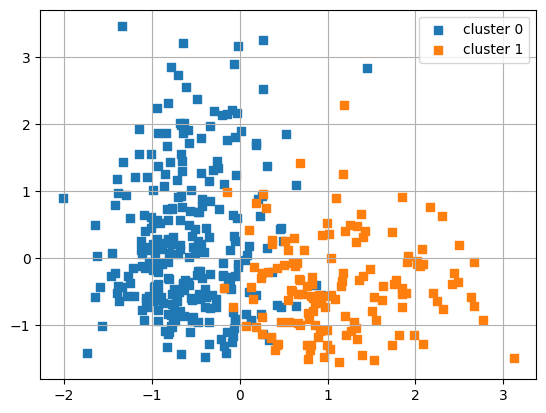

In [387]:
# Plotting KMeans Grocery vs Frozen Spending
for cluster in set(y_km):
    x = transformedData[y_km == cluster]['Grocery']
    y = transformedData[y_km == cluster]['Frozen']
    plt.scatter(x, y, marker='s', label=f'cluster {cluster}')

plt.legend()
plt.grid()
plt.show()

__Cluster 0 also spends slightly more on fresh products.__

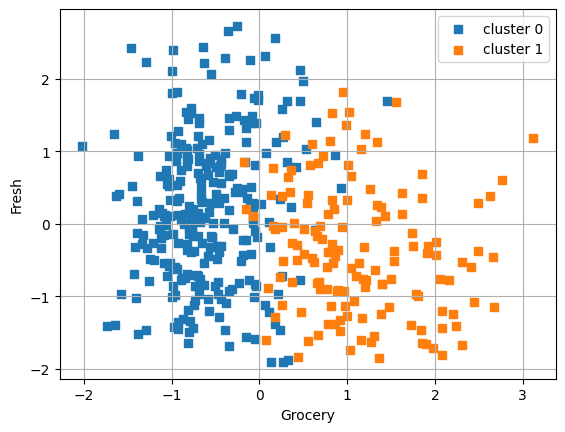

In [388]:
# Plotting KMeans Grocery vs Fresh Spending
for cluster in set(y_km):
    x = transformedData[y_km == cluster]['Grocery']
    y = transformedData[y_km == cluster]['Fresh']
    plt.scatter(x, y, marker='s', label=f'cluster {cluster}')
plt.xlabel('Grocery')   
plt.ylabel('Fresh')    
plt.legend()
plt.grid()
plt.show()

__cluster 1 spends more on detergents paper products where as clust 0 spends much less__

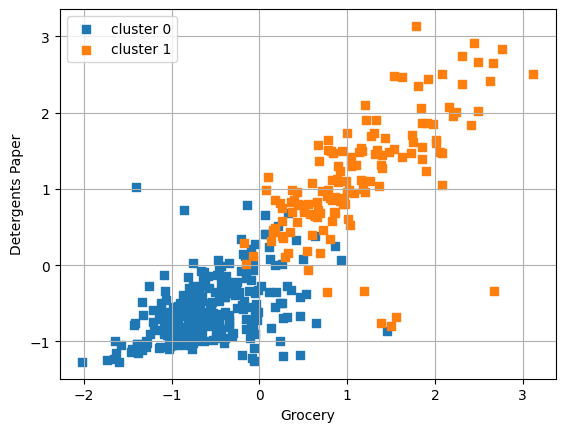

In [392]:
# Plotting HC Grocery vs Detergents Paper Spending
for cluster in set(y_hc):
    x = transformedData[y_km == cluster]['Grocery']
    y = transformedData[y_km == cluster]['Detergents_Paper']
    plt.scatter(x, y, marker='s', label=f'cluster {cluster}')
plt.xlabel('Grocery')   
plt.ylabel('Detergents Paper')    
plt.legend()
plt.grid()
plt.show()

__Cluster 0 was spents more on Milk, Grocery, and Detergents, where cluster 2 spend more of Deli and Fresh products__

In [404]:
pcaComponents[continuous_cols]

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.187600  0.486793  0.536633 -0.193545          0.528094    0.171007
1  0.554645  0.208565  0.064169  0.541841         -0.052219    0.590245